In [2]:
import numpy as np
from code_for_hw02 import *
import matplotlib.pyplot as plt

from matplotlib import colors
from labellines import labelLines
from matplotlib.animation import FuncAnimation

## Perceptron algorithm

In [596]:

def perceptron(data, labels, params = {}, draw = True):
    print("")
    print("Perceptron algorithm started")
    d, n = data.shape
    theta = np.zeros((d, 1))
    theta0 = np.zeros((1, 1))
    param_animation = []
    T = params.get('T', 1000)
    for j in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if (np.sign(np.dot(theta.T, x) +theta0)* y)> 0:
                continue
            else:
                theta = theta + y * x
                theta0 += y
                param_animation.append((theta.T, theta0.item()))
    print("d = {}, n = {}, theta shape = {}, theta_0 shape = {}".format(d,n,theta.shape,theta0.shape))
    
    if draw:
        global param_list
        param_list = param_animation

    return theta, theta0

def averaged_perceptron(data, labels, params = {}, draw = None):
    print("")
    print("Average Perceptron algorithm started")
    d, n = data.shape
    theta = np.zeros((d, 1))
    theta0 = np.zeros((1, 1))
    theta_average = np.zeros((d, 1))
    theta0_average = np.zeros((1, 1))
    param_animation = []
    T = params.get('T', 1000)
    for j in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if (np.sign(np.dot(theta.T, x) +theta0)* y)<= 0:
                theta = theta + y * x
                theta0 += y
                param_animation.append((theta_average.T,theta0_average.item()))
            theta_average += theta
            theta0_average += theta0
            if (T*j + n*i)>0:
                param_animation.append((theta_average.T/(T*j + n*i),theta0_average.item()/(T*j + n*i)))
            
    print("d = {}, n = {}, theta shape = {}, theta_0 shape = {}".format(d,n,theta.shape,theta0.shape))
    if draw:
        global param_list
        param_list = param_animation
    return theta_average / (T * n), theta0_average / (T * n)


## Generate Data

In [611]:
import numpy as np
 
def generate_data(shape, thetainput=np.array([[-1,5]]) , theta0input=1 , margin=1, range = 10):
    d, n = shape
    data = np.random.randn(d, n)*range
    theta = thetainput
    theta0= theta0input
    if thetainput.size ==0 :
        theta = np.random.randn(d, 1)
        theta0 = np.random.randn(1, 1)
    distance_margin_mask = (np.abs(np.dot(theta, data)/np.linalg.norm(theta) + theta0)>margin)[0]
    labels = np.sign(np.dot(theta, data) + theta0)
    return data[:,distance_margin_mask], labels[:,distance_margin_mask]

# generate_data([2,10], np.array([[10,5]]), 0, 5)

## Plot Data

(-18.129951863534274, 20.952124516890766)

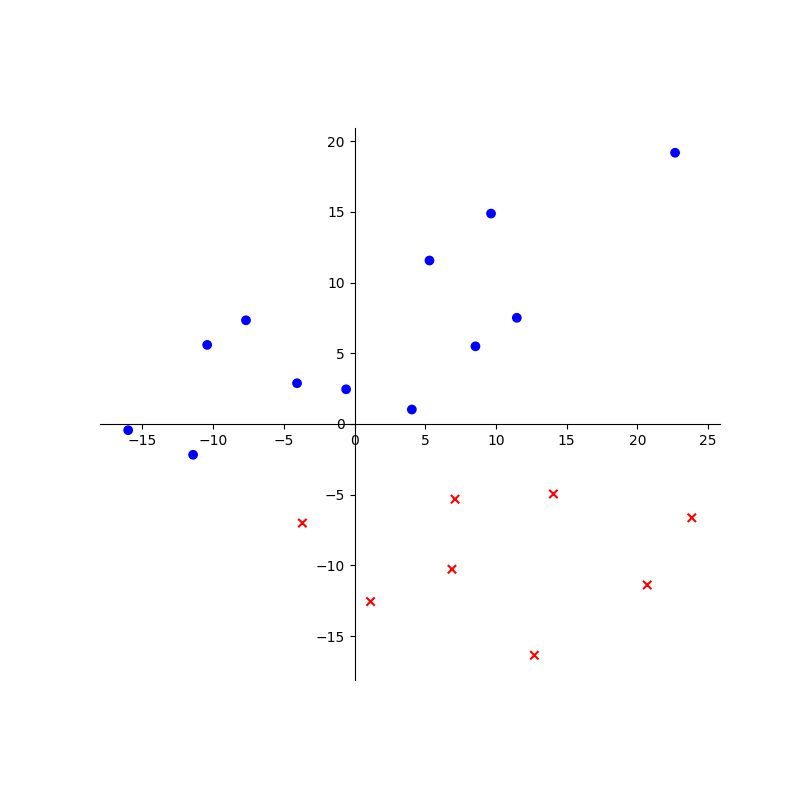

In [645]:
import numpy as np
from code_for_hw02 import *
import matplotlib.pyplot as plt

from matplotlib import colors
from labellines import labelLines
import matplotlib.animation as animation




def get_separator_line(theta, theta0, xmin, xmax, ymin, ymax):
    # if 0,0 return
    if (theta[0,1] ==0) and (theta[0,0] ==0):
        return ([1,1],[2,2])
    
    if theta[0,1] !=0:
        y = ([( -x * theta[0,0] - theta0)/theta[0,1]   for x in (xmin, xmax)])
    else:
        y = [ymin, ymax]
    if theta[0,0]!=0:
        x = ([( -y * theta[0,1] - theta0)/theta[0,0]   for y in (ymin, ymax)])
    else:
        x = [xmin,xmax]

    if  theta[0,0] == 0 or theta[0,1]==0:
        return (x,y)

    # none are zero
    xmin_point = [xmin,y[0]]
    xmax_point = [xmax,y[1]]
    ymin_point = [x[0], ymin]
    ymax_point = [x[1], ymax]
    sorted_point = sorted([xmin_point,xmax_point,ymin_point,ymax_point], key=lambda point: point[0])
    # Two middle point
    point1 = sorted_point[1]
    point2 = sorted_point[2]
    return ([point1[0],point2[0]],[point1[1], point2[1]])

def get_normal_line(x_plot, y_plot, theta):
    if (theta[0,0] ==0) and (theta[0,1] ==0):
        return [0,0,1,1]
    x_mid_point = (x_plot[0]+x_plot[1])/2
    y_mid_point = (y_plot[0]+y_plot[1])/2
    length = np.linalg.norm(np.array([x_plot[0], y_plot[0]])-np.array([x_plot[1],y_plot[1]]))
    length_normal_vector = np.linalg.norm(theta)
    if length_normal_vector <= 0.0001:
        length_normal_vector = 1
    x_arrow = length/30*theta[0,0]/length_normal_vector
    y_arrow = length/30*theta[0,1]/length_normal_vector
    return (x_mid_point, y_mid_point, x_arrow,y_arrow)


# %matplotlib ipympl 
# %matplotlib inline
def plot_separator(frame =1):
    global line, arrow
    if line is not None:
        line[0].set_alpha(0.1)
        arrow.remove()
    (theta, theta0)  = theta_param[frame]
    x_plot, y_plot = get_separator_line(theta, theta0, xmin, xmax, ymin, ymax)
    #Plot separator
    line = ax.plot(x_plot,y_plot,c='y', label = frame)
    labelLines(line,align=True, xvals = xmax*9/10)
    
    #Normal line
    arrow = plot_normal(x_plot, y_plot, theta)
    return line

def plot_normal(x_plot, y_plot, theta):
    base_x, base_y, arrow_x, arrow_y = get_normal_line(x_plot, y_plot, theta)
    arrow = ax.arrow(base_x, base_y, arrow_x, arrow_y, head_width=1, head_length=1, fc='green', ec='green')
    return arrow

def init_plot():
    plt.close('all')
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.ion()
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    return fig, ax

def plot_data(data, labels):
    fig, ax = init_plot()
    colors = np.choose(labels > 0, cv(['r', 'b']))[0]
    labels_flat = labels.flatten()
    neg_idx = (labels_flat < 0)
    pos_idx = (labels_flat >= 0)
    ax.scatter(data[0, neg_idx], data[1, neg_idx], c=colors[neg_idx], marker='x')
    ax.scatter(data[0, pos_idx], data[1, pos_idx], c=colors[pos_idx], marker='o')
    return fig, ax

def get_training_param(size = 10):
    theta_param = []
    for i in range(size):
        theta_param.append((np.random.randint(-7,7,(1,2)), np.random.randint(-3,3)))
    return theta_param
%matplotlib ipympl 

data, labels = generate_data([2,20])
fig, ax = plot_data(data,labels)
xmin, xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
line= None

theta_param = get_training_param(20)
# for item in theta_param:
#     print(*item)
# theta_param = []
# theta_param.append((np.array([[-1, -6]]), 1))
# plot_separator(0)
ani = animation.FuncAnimation(fig, plot_separator, frames=len(theta_param), blit=True, interval=300, repeat=False)
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax) 

## Score Eval Classifier

In [529]:
import time

def scorePhong(data, labels, theta, theta0):
    dot= np.sign(np.dot(theta.T,data)+theta0)==labels
    return np.sum(dot, axis = 1)

def eval_classifier(learner, data, labels, data_test, labels_test):
    theta, theta0 = learner(data, labels,params={'T':100})
    if data_test is None or labels_test is None:
        score1 = score(data, labels, theta, theta0)
        total = data.shape[1]
        print(f"No Test Available. Score of {learner.__name__} on training set: {score1} out of {total}")
        return 
    else:
        score1 = score(data_test, labels_test, theta, theta0)
        total = data_test.shape[1]
        print(f"Score of {learner.__name__} on training set: {score1} out of {total}")
    return score1/total


## Evaluate learning algorithm

In [ ]:

def eval_learning_alg(learner, data_gen, n_train, n_test, it):
    score = 0
    for i in range(it):
        data, labels = data_gen(n_train)
        test_data, test_labels = data_gen(n_test)
        score += eval_classifier(learner, data, labels, test_data, test_labels)
    return score/it

score2 = eval_learning_alg(averaged_perceptron, generate_data, (2,60), (2,20), 5)

print(f'Average score {score2}')


Average Perceptron algorithm started
d = 2, n = 54, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 54 out of 54

Average Perceptron algorithm started
d = 2, n = 58, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 58 out of 58

Average Perceptron algorithm started
d = 2, n = 56, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 56 out of 56

Average Perceptron algorithm started
d = 2, n = 54, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 54 out of 54

Average Perceptron algorithm started
d = 2, n = 53, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 53 out of 53
Average score 1.0


In [841]:
def xval_learning_alg(learner, data, labels, k):
    dataSplits = np.array_split(data,k,1)
    labelsSplits = np.array_split(labels,k,1)
    score = 0
    for j in range(k):
        D_minus_j = np.concatenate([dataSplits[i] for i in range(k) if i !=j], axis = 1)
        D_j = dataSplits[j]
        Labels_minus_j = np.concatenate([labelsSplits[i] for i in range(k) if i !=j], axis = 1)
        Labels_j = labelsSplits[j].flatten()
        score += eval_classifier(learner, D_minus_j, Labels_minus_j, D_j, Labels_j)
    return score/k

data, labels = generate_data((2,500))
score1 = xval_learning_alg(averaged_perceptron, data, labels, 10)
print(f'\nAverage score cross validation: {score1}')


Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 410, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 46 out of 46

Average Perceptron algorithm started
d = 2, n = 411

In [1039]:
flip_gen = gen_flipped_lin_separable(pflip=0.25)
data, labels = flip_gen(20)
score1 =  eval_learning_alg(averaged_perceptron, flip_gen, 20, 20, 20)
print(f'\nAverage score cross validation: {score1}')


Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 12 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 14 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 20 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 13 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 14 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of averaged_perceptron on training set: 17 out of 20

Average Perceptron algorithm started
d = 2, n = 20, theta


Perceptron algorithm started
d = 2, n = 541, theta shape = (2, 1), theta_0 shape = (1, 1)
Score of perceptron on training set: 543 out of 543
[(array([[-9.53422647, 11.95563208]]), 1.0), (array([[-0.71115876, 17.50791373]]), 2.0), (array([[-20.8767854,  15.5059207]]), 3.0), (array([[-9.25670757, 21.48499694]]), 2.0), (array([[-3.41333146, 23.84624551]]), 3.0), (array([[-20.18346784,  20.93085755]]), 4.0), (array([[-8.74549058, 24.54091701]]), 5.0), (array([[-3.95081240e-03,  2.69935888e+01]]), 6.0), (array([[-21.611533  ,  23.58771087]]), 7.0), (array([[-9.03516233, 33.55917334]]), 6.0), (array([[ 6.01455829, 36.72729622]]), 7.0), (array([[-8.34583327, 37.07420503]]), 6.0), (array([[ 2.56997556, 39.30071986]]), 7.0), (array([[-14.87332738,  39.92074511]]), 6.0), (array([[-2.91901339, 42.67811196]]), 7.0), (array([[-23.08464003,  40.67611893]]), 8.0), (array([[-11.4645622 ,  46.65519517]]), 7.0), (array([[ 3.58515842, 49.82331805]]), 8.0), (array([[-10.77523314,  50.17022685]]), 7.0), 

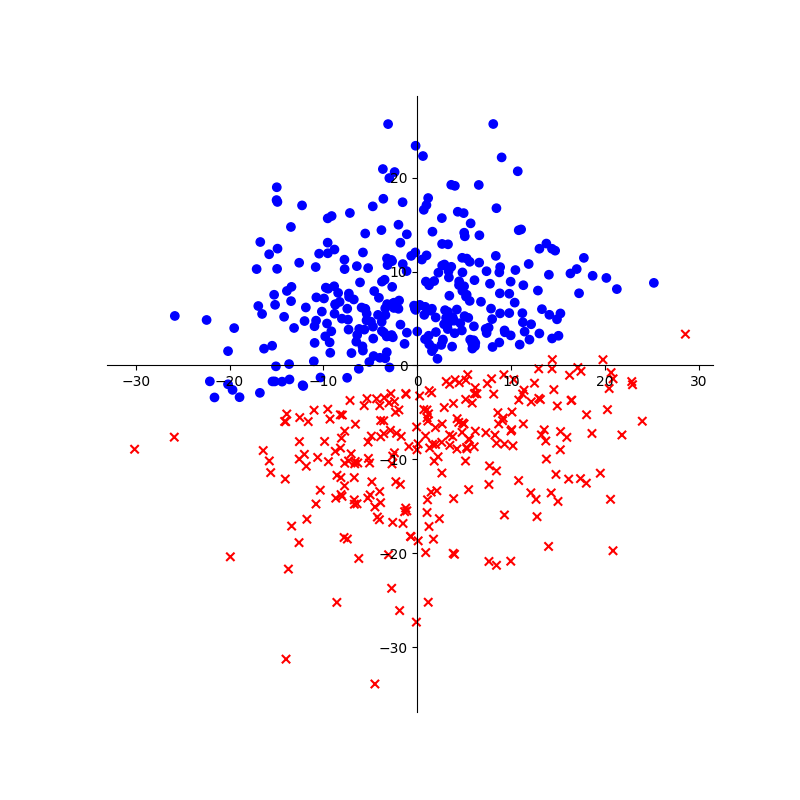

In [750]:
data, labels = generate_data((2,600))
test_data, test_labels = generate_data((2,600))
eval_classifier(perceptron, data, labels, test_data, test_labels)
fig, ax = plot_data(data,labels)
xmin, xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()
line= None
theta_param = param_list
ani = animation.FuncAnimation(fig, plot_separator, frames=len(theta_param), blit=True, interval=300, repeat=False)
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax) 
print (theta_param)

In [747]:
import numpy as np
x = np.arange(10.0)
print(x)
a = np.array_split(x, 4)
b = np.concatenate(a)
print(a)
print(b)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7.]), array([8., 9.])]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
